# IMDB Data Analysis for Movie Production Recommendations

The purpose of this report is to offer recommendation for the production of movies for Sussex Budget Productions based on IMDB historical data. 

In [1]:
#import libraries
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid') #sets style for charts in seaborn

myfile = 'C:/Users/hp/OneDrive - University of Sussex/DSRM Assignment/movie_metadata.csv'

#read the movie data file into a dataframe in pandas.
df = pd.read_csv(myfile,index_col=None)

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) #prevents numerical values from displaying in exponential notation

In [3]:
df.head() #view first five rows of data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.000,178.000,0.000,855.000,Joel David Moore,1000.000,760505847.000,Action|Adventure|Fantasy|Sci-Fi,...,3054.000,English,USA,PG-13,237000000.000,2009.000,936.000,7.900,1.780,33000
1,Color,Gore Verbinski,302.000,169.000,563.000,1000.000,Orlando Bloom,40000.000,309404152.000,Action|Adventure|Fantasy,...,1238.000,English,USA,PG-13,300000000.000,2007.000,5000.000,7.100,2.350,0
2,Color,Sam Mendes,602.000,148.000,0.000,161.000,Rory Kinnear,11000.000,200074175.000,Action|Adventure|Thriller,...,994.000,English,UK,PG-13,245000000.000,2015.000,393.000,6.800,2.350,85000
3,Color,Christopher Nolan,813.000,164.000,22000.000,23000.000,Christian Bale,27000.000,448130642.000,Action|Thriller,...,2701.000,English,USA,PG-13,250000000.000,2012.000,23000.000,8.500,2.350,164000
4,NaN,Doug Walker,NaN,NaN,131.000,NaN,Rob Walker,131.000,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.000,7.100,NaN,0


In [4]:
df.info() #views information about the data and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

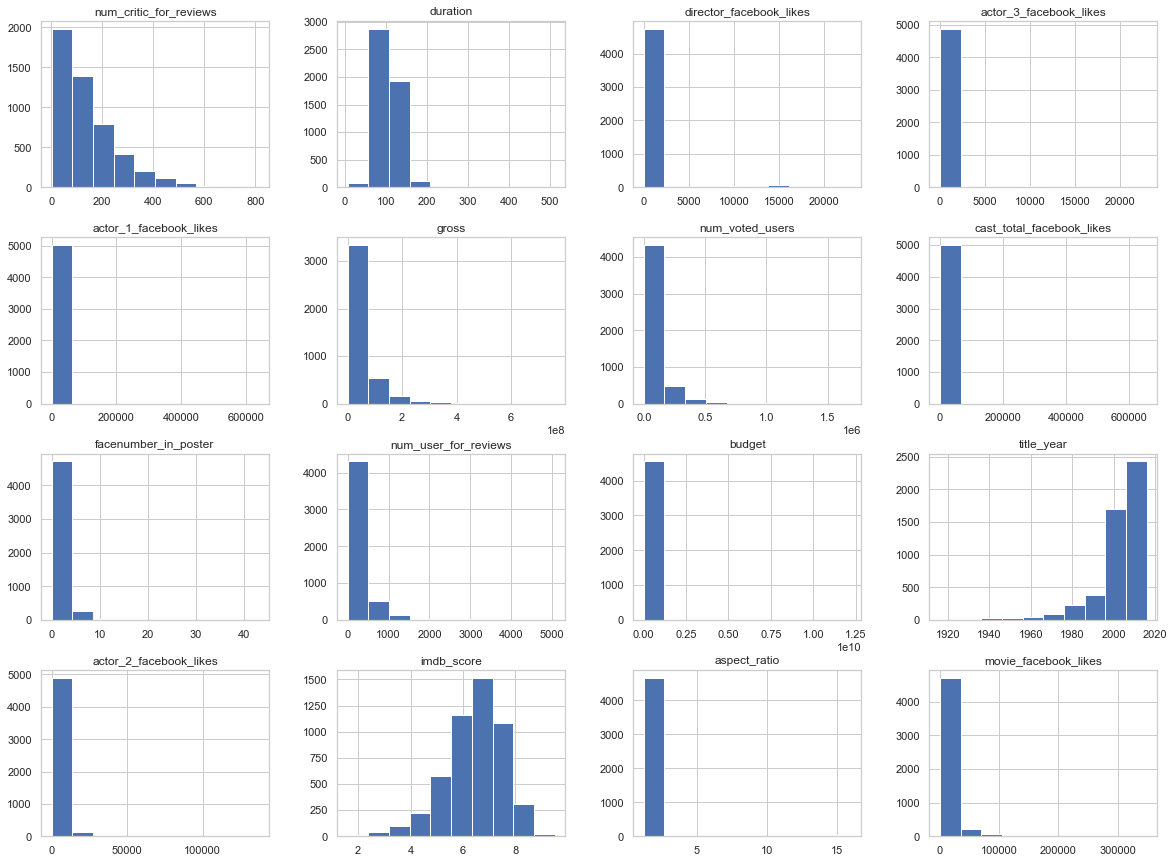

In [5]:
df.hist(figsize=(20, 15)); #plots histogram for all numerical data

In [6]:
df.dropna(inplace=True) #drop rows with missing values so as to improve the accuracy of our analysis

In [7]:
df.shape

(3756, 28)

In [8]:
df["GPM"] = df["gross"] / (df["budget"]) * 100 #calculates gross profit margin in terms of percentage

In [9]:
df.shape #shape of data after removing missing values

(3756, 29)

In [10]:
df.describe().T #summary statistics of data

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,3756.000,167.378,123.452,2.000,77.000,138.500,224.000,813.000
duration,3756.000,110.258,22.647,37.000,96.000,106.000,120.000,330.000
director_facebook_likes,3756.000,807.337,3068.172,0.000,11.000,64.000,235.000,23000.000
actor_3_facebook_likes,3756.000,771.280,1894.250,0.000,194.000,436.000,691.000,23000.000
actor_1_facebook_likes,3756.000,7751.339,15519.340,0.000,745.000,1000.000,13000.000,640000.000
gross,3756.000,52612824.237,70317866.909,162.000,8270232.750,30093107.000,66881940.750,760505847.000
num_voted_users,3756.000,105826.733,152035.399,91.000,19667.000,53973.500,128602.000,1689764.000
cast_total_facebook_likes,3756.000,11527.102,19122.177,0.000,1919.750,4059.500,16240.000,656730.000
facenumber_in_poster,3756.000,1.377,2.042,0.000,0.000,1.000,2.000,43.000
num_user_for_reviews,3756.000,336.843,411.227,4.000,110.000,210.000,398.250,5060.000


In [11]:
good_score = [True if i >= 7.5 else False for i in df["imdb_score"]] #sets to true if rating is greater or equal to 8, otherwise true
df["good_score"] = good_score #creates new column

## Questions

### 1. Directors to make use of

In [12]:
def top_performers(df, column):
    """
    Sorts the mean imdb score and budget across films by colum
    Takes dataframe and column name as input parameters
    """

    series = df.groupby(column)[['imdb_score','budget']].mean()
    #set the minimum imdb score that I care about to 7.5
    min_imdb_score = 7.5
    top_rated = series[series['imdb_score'] > min_imdb_score]
    top_rated = top_rated.sort_values('imdb_score', ascending=False)
    
    return top_rated

In [13]:
def top_within_budget(df, column):
    """
    Extract rows within budget
    """
    #set the maximum possible budget to 500 000
    max_budget = 500000
    topseries=df.groupby(column)[['imdb_score','budget','gross', "GPM"]].mean()
    #find the details of films with less than the maximum budget
    budget_series = topseries[(topseries['budget']<max_budget) & (topseries['imdb_score'] > 7.5)]
    budget_series = budget_series.sort_values('imdb_score',ascending=False)
    return budget_series

In [14]:
top_rated_directors = top_performers(df, "director_name") #view top performing directors with highest mean rating
top_rated_directors.head()

,imdb_score,budget
director_name,,
Akira Kurosawa,8.700,2000000.000
Charles Chaplin,8.600,1500000.000
Tony Kaye,8.600,7500000.000
Ron Fricke,8.500,4000000.000
Alfred Hitchcock,8.500,806947.000


In [15]:
budget_director_series = top_within_budget(df, "director_name") #check for gross return based on budget
budget_director_series

,imdb_score,budget,gross,GPM
director_name,,,,
Majid Majidi,8.500,180000.000,925402.000,514.112
Andrew Haigh,7.700,120000.000,469947.000,391.623
Lloyd Bacon,7.700,439000.000,2300000.000,523.918
Ricki Stern,7.700,200000.000,1111.000,0.555
Kevin Jordan,7.600,40000.000,277233.000,693.082


In [16]:
df[df['director_name'] == 'Majid Majidi']

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,GPM,good_score
4921,Color,Majid Majidi,46.000,89.000,373.000,27.000,Amir Farrokh Hashemian,36.000,925402.000,Drama|Family,...,Iran,PG,180000.000,1997.000,35.000,8.500,1.850,0,514.112,True


Top directors to consider include; Majid Majidi and Andrew Haigh.  
They have over 300 gross per margin profit. This is subject to further analysis because they only appeared once in the dataset.

### 2. Lead actors to consider

In [17]:
top_rated_actors = top_performers(df, "actor_1_name")
top_rated_actors.head()

,imdb_score,budget
actor_1_name,,
Takashi Shimura,8.700,2000000.000
Scatman Crothers,8.700,4400000.000
Bunta Sugawara,8.600,19000000.000
Paulette Goddard,8.600,1500000.000
Bahare Seddiqi,8.500,180000.000


In [18]:
budget_actor_series = top_within_budget(df, "actor_1_name")
budget_actor_series

,imdb_score,budget,gross,GPM
actor_1_name,,,,
Bahare Seddiqi,8.500,180000.000,925402.000,514.112
Glen Hansard,7.900,180000.000,9437933.000,5243.296
Darryl Hunt,7.700,200000.000,1111.000,0.555
Derick Martini,7.600,40000.000,277233.000,693.082


In [19]:
df[df['actor_1_name'] == 'Glen Hansard']

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,GPM,good_score
4931,Color,John Carney,232.000,85.000,109.000,18.000,Markéta Irglová,200.000,9437933.000,Drama|Music|Romance,...,Ireland,R,180000.000,2007.000,96.000,7.900,1.850,26000,5243.296,True


In [20]:
df[df['actor_1_name'] == 'Bahare Seddiqi']

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,GPM,good_score
4921,Color,Majid Majidi,46.000,89.000,373.000,27.000,Amir Farrokh Hashemian,36.000,925402.000,Drama|Family,...,Iran,PG,180000.000,1997.000,35.000,8.500,1.850,0,514.112,True


Top directors to consider include; Bahare Seddiqi and Glen Hansard.
They have over 500 gross per margin profit. This is subject to further analysis because they only appeared once in the dataset.

### 3. Genre of movie to consider

In [21]:
top_rated_genres = top_performers(df, "genres")
top_rated_genres.head()

,imdb_score,budget
genres,,
Adventure|Animation|Drama|Family|Musical,8.500,45000000.000
Crime|Drama|Fantasy|Mystery,8.500,60000000.000
Adventure|Animation|Fantasy,8.400,2400000000.000
Adventure|Drama|Thriller|War,8.400,14000000.000
Biography|Drama|History|Music,8.300,18000000.000


In [22]:
budget_genres_series = top_within_budget(df, "genres")
budget_genres_series.head(10)

,imdb_score,budget,gross,GPM
genres,,,,
Crime|Documentary,7.700,200000.000,1111.000,0.555


In [23]:
df[df['genres'] == 'Crime|Documentary']

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,GPM,good_score
4915,Color,Ricki Stern,11.000,106.000,15.000,0.000,Evelyn Jefferson,2.000,1111.000,Crime|Documentary,...,USA,PG-13,200000.000,2006.000,0.000,7.700,1.660,246,0.555,True


Movies with Crime and Documentary as genre should be invested in, in other to maximize profit.

### 4. Duration range to consider

In [24]:
good = df.good_score == True #movie is classified as good if rating is greater or equal to 7.5
bad = df.good_score == False #movie is classified as good if rating is lesser to 7.5

In [25]:
df.duration[good].mean() #calculates mean duration of good movies

125.01892744479495

In [26]:
df.duration[bad].mean() #calculates mean duration of bad movies

107.26040999359385

Generally, it appears that the good movies with higher rating have a longer duration.

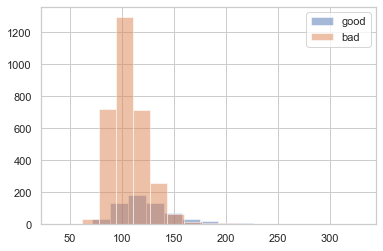

In [27]:
df.duration[good].hist(alpha=0.5, bins=17, label='good')
df.duration[bad].hist(alpha=0.5, bins=17, label='bad')
plt.legend();

More of movies with ratings above 7.5 seems to fall within the range of 150 minutes and above. Next movies that will be produced should be in that range.  
Movies with duration less than 100 minutes appears to have very poor ratings

There appears to be some well-rated genres that we could propose as better options to make a film. To examine if any of these good film genres can be made within our budget, I filtered by a maximum 500 000 and looked at the gross return.

# Hypothesis Testing


Null Hypothesis:
The average duration for a profit making movie is 150 minutes

Alternative Hypothesis:
The average duration for a profit making movie is not 150 minutes

In [28]:

import math
from scipy import stats
from math import sqrt

In [29]:
Pon_Mean  = 150
Sample_Mean  = 107
Std_Dev  = 25
n = 5028

Z = (Sample_Mean - Pon_Mean )/ (Std_Dev/sqrt(n))

PVALUE =  1- stats.norm.cdf(Z)

def decison_rule():
    if PVALUE < 0.05:
        print('Reject the Null Hypothesis')
    else:
        return ('Accept the Null Hypothesis')

    
decison_rule()

'Accept the Null Hypothesis'

Since the PVALUE is greater that 0.05, we are accepting the null hypothesis stating that "The average duration for a profit making movie is 150 minutes"

# Summary

I examined the imdb data file to check for missing values and also removed them so as to improve accuracy of analysis.
I used 7.5 imdb as the baseline rating for good movies, any movies below 7.5 would not be considered as a good movie.  
I calculated the percentage gross profit based on budget to justify if there was substantial return based on investment.  

Based on the analysis of data, I discovered that Majid Majidi and Andrew Haigh were the directors to consider based on the fact that they had good ratings and gross profit. However, as this conclusion is based upon a single film, it is not likely to be a good course of action.

I also discovered that movies with longer duration appear to have more rating and more gross profit. Particulary movies above 150 minutes seemed to have more ratings than other movies with lesser duration. Investing more in longer movies will generate more profit.  

Movies with genres of Crime and documentary also appeared to have more ratings and gross profit than other movies. However, as this conclusion is based upon a single film, it is not likely to be a good course of action.